# Damped Harmonic Oscillator (Ohmic Bath)
Compare Redfield and Lindblad thermalization toward Bose-Einstein occupation.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import destroy, basis, brmesolve, mesolve, thermal_dm, tensor, qeye, OhmicEnvironment

from diagnostics import trajectory_min_eigs
from plotting import style, populations_from_states, coherences_from_states
style()

In [29]:
N=10
a=destroy(N)
w=1.0
H=w*a.dag()*a

bath=OhmicEnvironment(T=2e-4, wc=10.0, alpha=0.01, s=1.0)

rho0=basis(N,5)*basis(N,5).dag()

tlist=np.linspace(0,50,500)

A=a + a.dag()  # position-like coupling

res_br=brmesolve(H, rho0, tlist, a_ops=[[A,bath]], sec_cutoff=-1)

# approximate Lindblad rates at frequency w

gamma_em=bath.power_spectrum(w)

gamma_abs=bath.power_spectrum(-w)

L_down=np.sqrt(gamma_em)*a

L_up=np.sqrt(gamma_abs)*a.dag()

res_me=mesolve(H, rho0, tlist, c_ops=[L_down,L_up])

n_th = 1/(np.exp(w/bath.T)-1)

C:\Users\leopo\AppData\Local\Temp\ipykernel_13956\2240433511.py:28: RuntimeWarning: overflow encountered in exp
  n_th = 1/(np.exp(w/bath.T)-1)


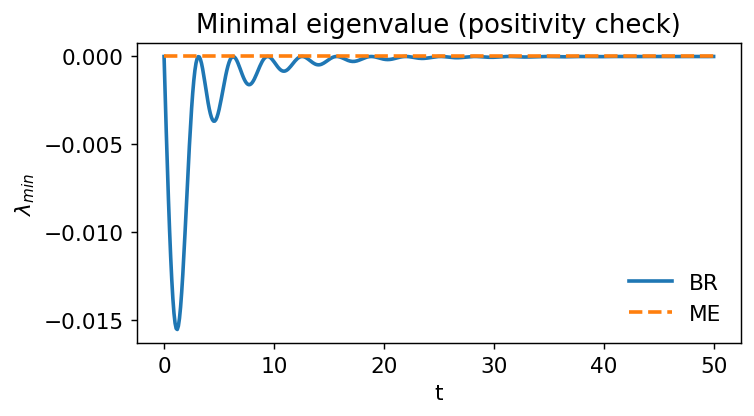

In [30]:
min_eigs_br = trajectory_min_eigs(res_br.states)
min_eigs_me = trajectory_min_eigs(res_me.states)
plt.figure(figsize=(6,3))
plt.plot(tlist, min_eigs_br, label='redfield')
plt.plot(tlist, min_eigs_me, label='linblad', ls='--')
plt.ylabel(r'$\lambda_{min}$')
plt.xlabel('t')
plt.legend(frameon=False)
plt.title('Minimal eigenvalue (positivity check)')
plt.show()

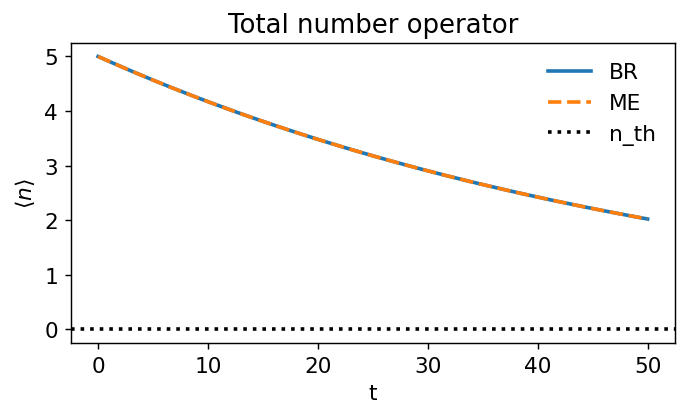

In [31]:
pops_br = populations_from_states(res_br.states)
pops_me = populations_from_states(res_me.states)
n_br = np.einsum('i,ij->j', np.arange(N), pops_br)
n_me = np.einsum('i,ij->j', np.arange(N), pops_me)

plt.figure(figsize=(6,3))
plt.plot(tlist, n_br, label='redfield')
plt.plot(tlist, n_me, label='linblad', ls='--')
plt.axhline(n_th, color='k', ls=':', label='n_th')
plt.xlabel('t')
plt.ylabel(r'$\langle n \rangle$')
plt.legend(frameon=False)
plt.title('Total number operator')
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\leopo\AppData\Local\Temp\ipykernel_13956\1761268409.py:12: SyntaxWarning: invalid escape sequence '\S'
  plt.plot(tlist, coh_sum_br, label=f'redfield $\Sigma$[coh]')
C:\Users\leopo\AppData\Local\Temp\ipykernel_13956\1761268409.py:13: SyntaxWarning: invalid escape sequence '\S'
  plt.plot(tlist, coh_sum_me, label=f'linblad $\Sigma$[coh]', ls='--')


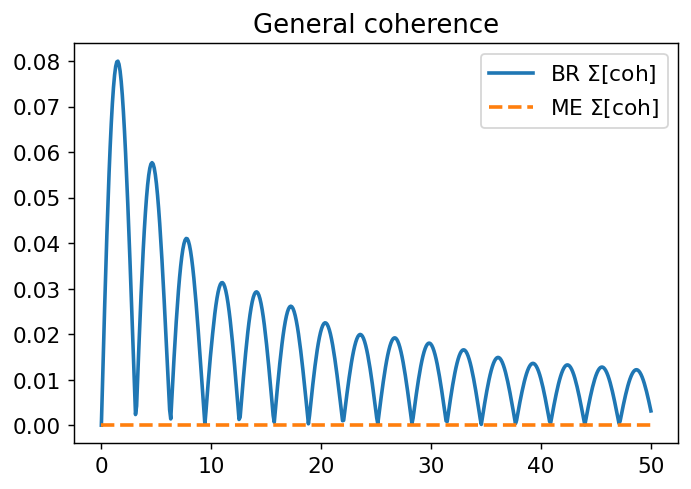

In [32]:
cohs_br = coherences_from_states(res_br.states)
cohs_me = coherences_from_states(res_me.states)


coh_sum_br = 0
coh_sum_me = 0
for i in range(len(cohs_br)):
    coh_sum_br += cohs_br[i]
    coh_sum_me += cohs_me[i]

plt.figure(figsize=(6,4))
plt.plot(tlist, coh_sum_br, label=f'redfield $\Sigma$[coh]')
plt.plot(tlist, coh_sum_me, label=f'linblad $\Sigma$[coh]', ls='--')
plt.title('General coherence')
plt.legend()
plt.show()